In [752]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/")
import GeoMig
#importlib.reload(GeoMig)
importlib.reload(GeoMig)
import numpy as np



test = GeoMig.GeoMigSim_pro2()

#print (ref_p)

test.create_regular_grid(0,10,0,10,50,50)
test.theano_set3()

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [781]:
layer_1 = np.array([[1,7],[5,7],[6,7], [9,8]], dtype = "float64")

layer_2 = np.array([[1,1],[5,1],[9,1]], dtype = "float64")

dip_pos_1 = np.array([2,4,], dtype = "float64")
dip_pos_2 = np.array([6.,3.], dtype = "float64")
dip_pos_3 = np.array([8,4], dtype = "float64")
dip_angle_1 = 60
dip_angle_2 = 70

layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1,dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2])
#print (dips_angles)

dips_angles

array([60, 70])

In [782]:
layers = [np.random.uniform(0,10,(10,2)) for i in range(100)]
dips = np.random.uniform(0,10, (100,2))
dips_angles = np.random.normal(90,10, 100)
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
#print( layers)

In [783]:
%%timeit
sol = test.geoMigueller(dips,dips_angles,rest, ref)[0]

1 loop, best of 3: 889 ms per loop


In [759]:
np.set_printoptions(precision=2)
test.geoMigueller(dips,dips_angles,rest, ref)[1]

array([[-0.59,  0.08,  0.  ,  0.07],
       [ 0.08, -0.59,  0.07,  0.  ],
       [ 0.  ,  0.12, -0.59,  0.13],
       [ 0.07,  0.  ,  0.13, -0.59]])

In [751]:
T.fill_diagonal?

[ 2.5   4.87] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


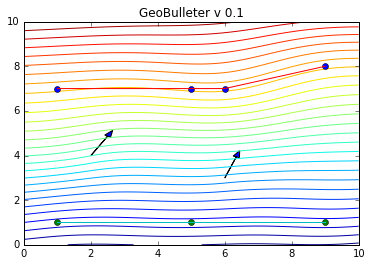

In [758]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(50,50) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

In [443]:
n = 10
#a = T.horizontal_stack(T.vertical_stack(T.ones(n),T.zeros(n)), T.vertical_stack(T.zeros(n), T.ones(n)))
a = T.zeros(n)

print (a.eval())
#U_G = T.horizontal_stack(([T.ones(n),T.zeros(n)],[T.zeros(n),T.ones(n)]))


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
T.stack?ö+aeg

In [ ]:
        _squared_euclidean_distances2 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_Y ** 2).sum(1).reshape(
                (1, aux_Y.shape[0])) - 2 * dips.dot(aux_Y.T))

        _squared_euclidean_distances3 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_X ** 2).sum(1).reshape(
                (1, aux_X.shape[0])) - 2 * dips.dot(aux_X.T))

        h3 = T.vertical_stack(
            (dips[:, 0] - aux_Y[:, 0].reshape((aux_Y[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_Y[:, 1].reshape((aux_Y[:, 1].shape[0], 1))).T
        )


        h4 = T.vertical_stack(
            (dips[:, 0] - aux_X[:, 0].reshape((aux_X[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_X[:, 1].reshape((aux_X[:, 1].shape[0], 1))).T)

        r_3 = T.tile(_squared_euclidean_distances2, (2, 1))  # Careful with the number of dimensions
        r_4 = T.tile(_squared_euclidean_distances3, (2, 1))  # Careful with the number of dimensions

        _ans_d1_3 = (r_3 < self.a) * (
            -7 * (self.a - r_3) ** 3 * r_3 * (8 * self.a ** 2 + 9 * self.a * r_3 + 3 * r_3 ** 2) * 1) 
        / (4 * self.a ** 7)

        _ans_d1_4 = (r_4 < self.a) * (
            -7 * (self.a - r_4) ** 3 * r_4 * (8 * self.a ** 2 + 9 * self.a * r_4 + 3 * r_4 ** 2) * 1) 
        / (4 * self.a ** 7)

        _C_GI = (h3 / r_3 * _ans_d1_3 - h4 / r_4 * _ans_d1_4).T

        self._f_CGI = theano.function([dips, aux_X, aux_Y], _C_GI)